# Contrast Adjustment

Contrast adjustment changes the difference between light and dark areas in an image.

- Low contrast: image looks dull, flat, grayish
- High contrast: bright areas become brighter, dark areas become darker

## Why do we need contrast adjustment?
- improves clarity
- enhances edges and textures
- prepare for ocmputer vision tasks (object detection segmentation)
- correct underexposed or overexposed images.

## How it works?

An image is made of pixel intensity values (0-255 for grayscale). Contrast adjustment stretches or compress these values.

## Methods for contrast adjustment

1. **Linear contrast stretching:** maps the minimum and maximum pixel values to 0 and 255.
$$
I_{new} = \frac{I - I_{min}}{I_{max} - I_{min}} \cdot 255
$$

2. **Histogram Equalization:** redistributes the intensities so the histgram of pixel values is uniform.

3. **CLAHE (Contrast Limited Adaptive Histogram Equalization)**: most powerful method. Works on local regions ans avoids over-brightening.

4. **Gamma Correction**: modifies the luminance.

$$
I_{new} = 255 \cdot (\frac{I}{255})^\gamma
$$

# Grayscale Images

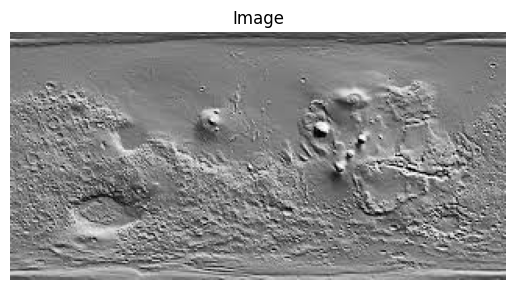

In [30]:
import cv2
import matplotlib.pyplot as plt

# image loading
img = cv2.imread("image.jpeg")


plt.imshow(img)
plt.title("Image")
plt.axis("off")
plt.show()

### 1. linear contrast stretching

In [31]:
# linear contrast stretching

alpha = 1.5   # (>1 - increases contrast)
beta = 0      # brightness control

$$
I_{new}(x,y) = \alpha \cdot I(x,y) + \beta
$$

In [32]:
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
cv2.imwrite('linear_contrast_stretching.jpg', adjusted)

True

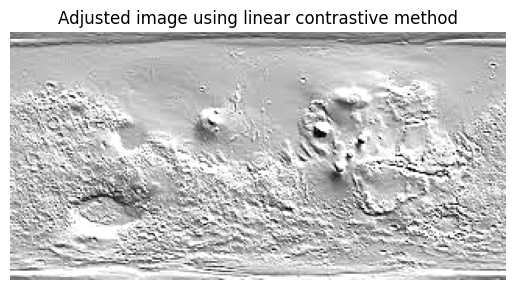

In [33]:
plt.imshow(adjusted)
plt.title("Adjusted image using linear contrastive method")
plt.axis("off")
plt.show()

### 2. Histogram equalization

In [34]:
import cv2
equalized = cv2.equalizeHist(img)

# cause for error: the shape of the image is 3 channel (BGR)
# so, even though the image looks gray, OpenCV treats it as a color image

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/histogram.cpp:3449: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


In [35]:
# check the image type
print(img.dtype, img.shape)

uint8 (159, 318, 3)


In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

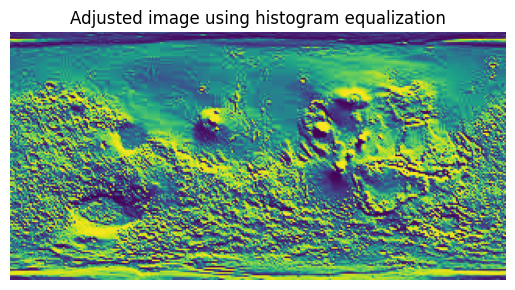

In [37]:
plt.imshow(equalized)
plt.title("Adjusted image using histogram equalization")
plt.axis("off")
plt.show()

#### Why is the output image with colors?

- appears only because of matplotlib's default color map (usually virdis)

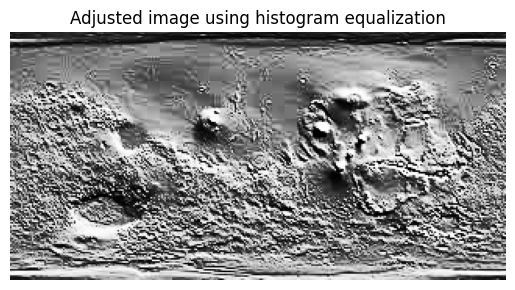

In [38]:
plt.imshow(equalized, cmap='gray')
plt.title("Adjusted image using histogram equalization")
plt.axis("off")
plt.show()

### 3. CLAHE

In [39]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
final = clahe.apply(gray)

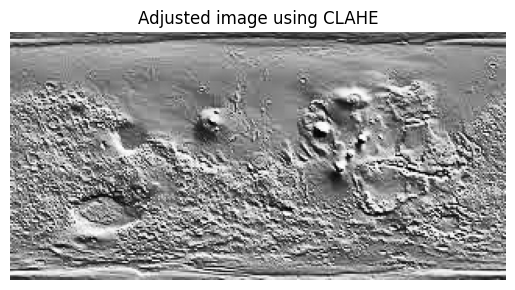

In [40]:
plt.imshow(final, cmap='gray')
plt.title('Adjusted image using CLAHE')
plt.axis('off')
plt.show()

## 4. Gamma Correction

In [41]:
# gamma correction

import numpy as np

def adjust_gamma(image, gamma=1.0):
  invGamma = 1.0 / gamma
  table = (np.array([(i/255.0) ** invGamma * 255 for i in np.arange(0, 256)])).astype("uint8")
  return cv2.LUT(image, table)


gamma_corrected_brighten = adjust_gamma(img, gamma=0.5)

gamma_corrected_darken = adjust_gamma(img, gamma=2.0)

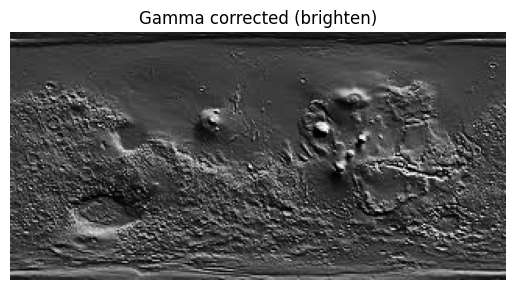

In [42]:
plt.imshow(gamma_corrected_brighten, cmap='gray')
plt.title("Gamma corrected (brighten)")
plt.axis("off")
plt.show()

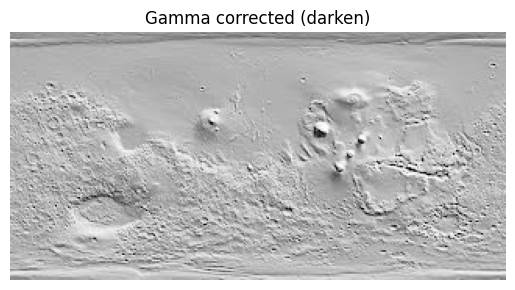

In [43]:
plt.imshow(gamma_corrected_darken, cmap='gray')
plt.title("Gamma corrected (darken)")
plt.axis("off")
plt.show()

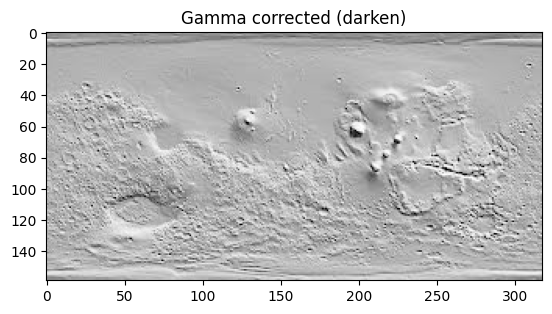

In [44]:
plt.imshow(gamma_corrected_darken, cmap='gray')
plt.title("Gamma corrected (darken)")
plt.show()

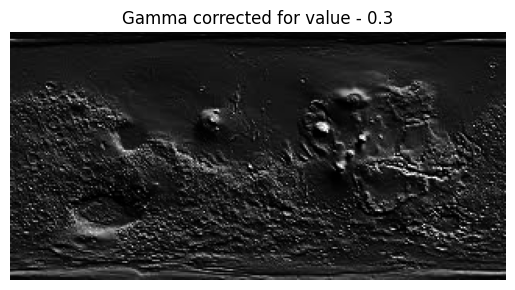

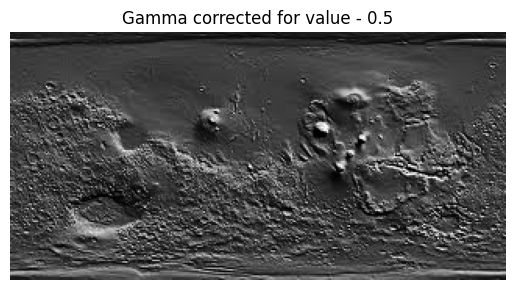

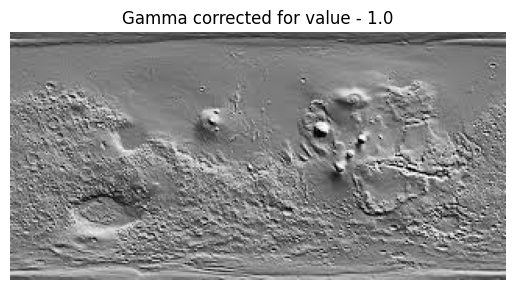

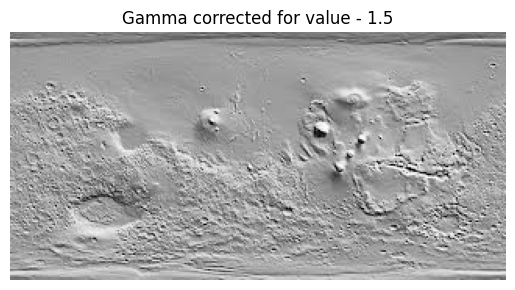

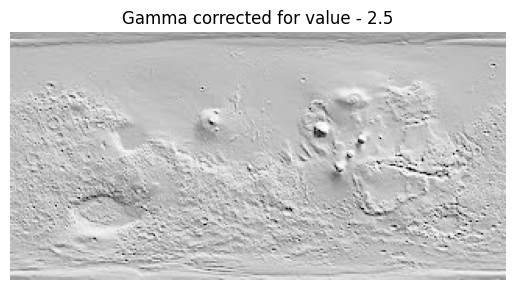

In [45]:
gamma_values = [0.3, 0.5, 1.0, 1.5, 2.5]

for value in gamma_values:
  gamma_corrected = adjust_gamma(img, gamma=value)
  plt.imshow(gamma_corrected, cmap='gray')
  plt.title(f"Gamma corrected for value - {value}")
  plt.axis("off")
  plt.show()



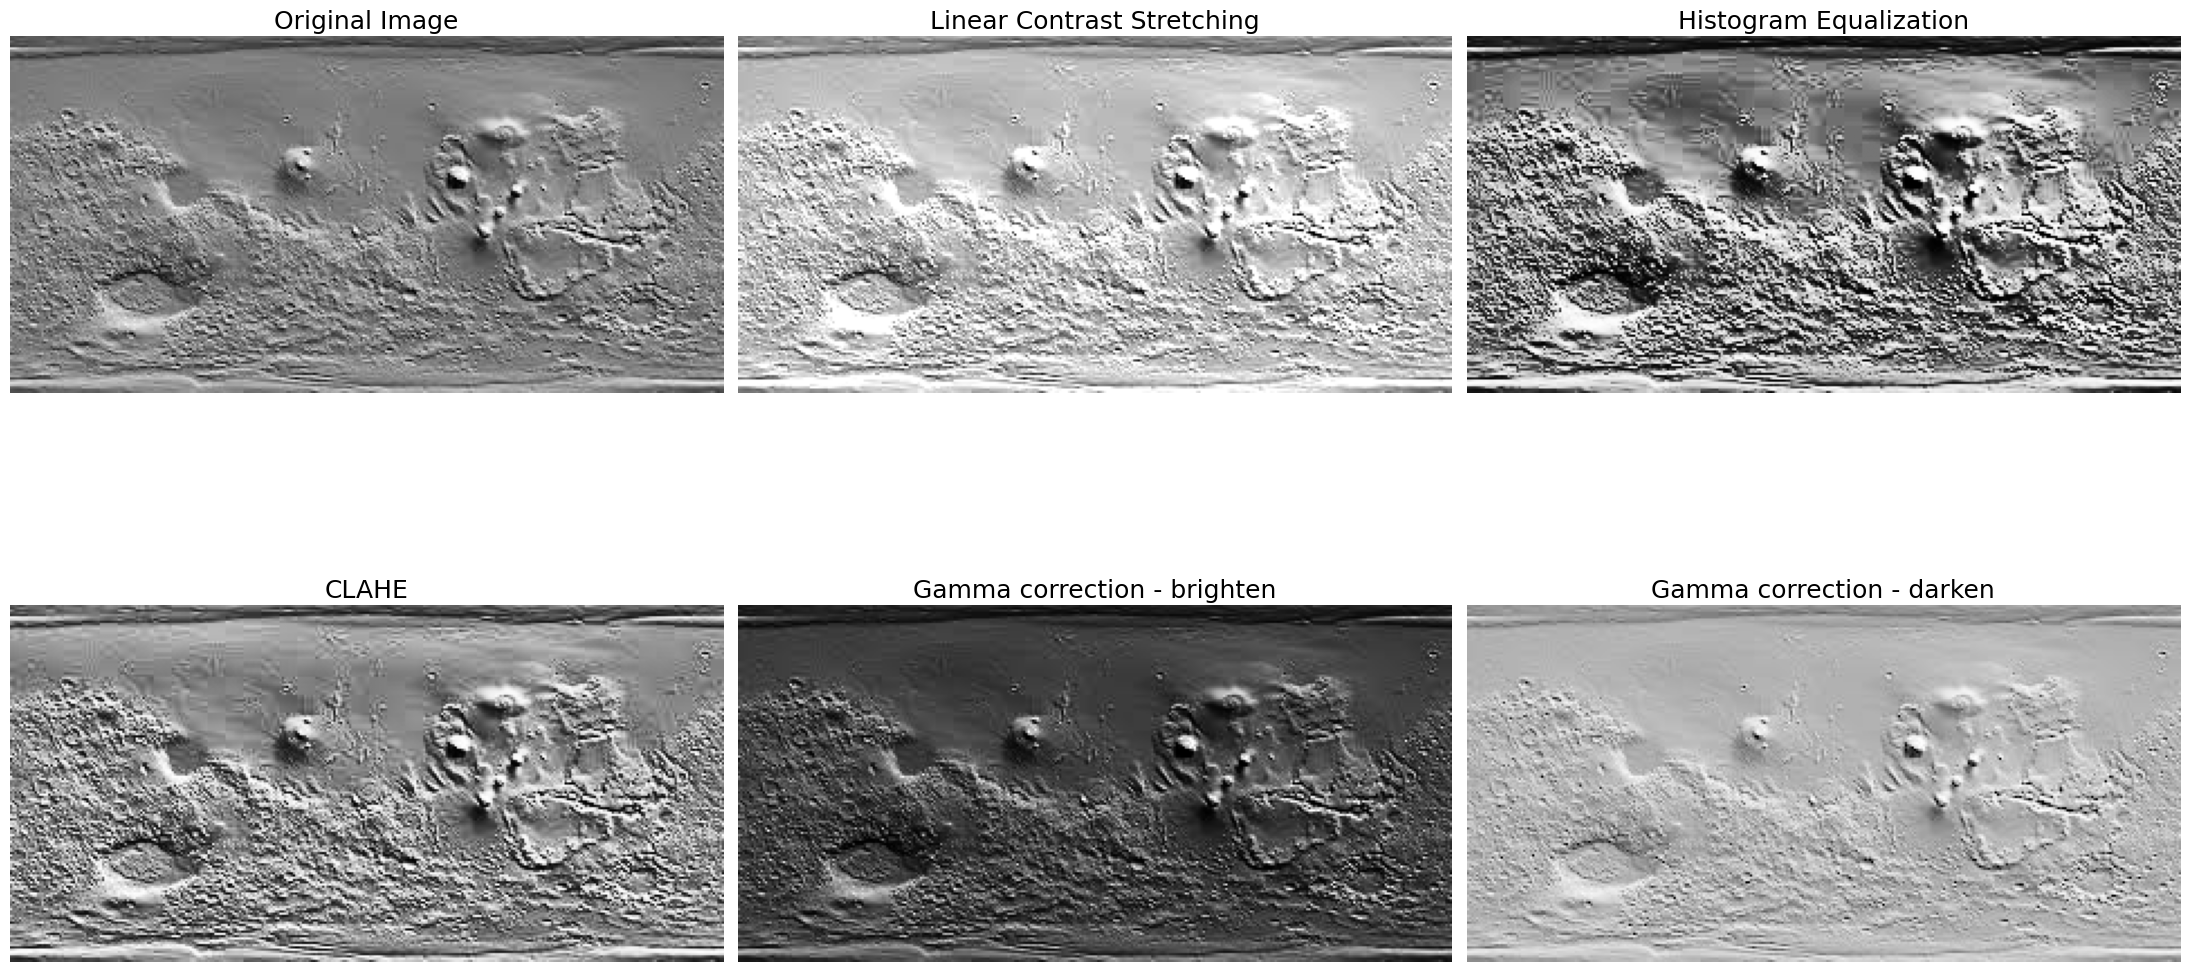

In [46]:
plt.figure(figsize=(22, 18))

# ----------- Row 1 -----------
plt.subplot(3, 3, 1)
plt.title("Original Image", fontsize=18)
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(3, 3, 2)
plt.title("Linear Contrast Stretching", fontsize=18)
plt.imshow(adjusted, cmap='gray')
plt.axis("off")

plt.subplot(3, 3, 3)
plt.title("Histogram Equalization", fontsize=18)
plt.imshow(equalized, cmap='gray')
plt.axis("off")

# ----------- Row 2 -----------
plt.subplot(3, 3, 4)
plt.title("CLAHE", fontsize=18)
plt.imshow(final, cmap='gray')
plt.axis("off")

plt.subplot(3, 3, 5)
plt.title("Gamma correction - brighten", fontsize=18)
plt.imshow(gamma_corrected_brighten, cmap='gray')
plt.axis("off")

plt.subplot(3, 3, 6)
plt.title("Gamma correction - darken", fontsize=18)
plt.imshow(gamma_corrected_darken, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

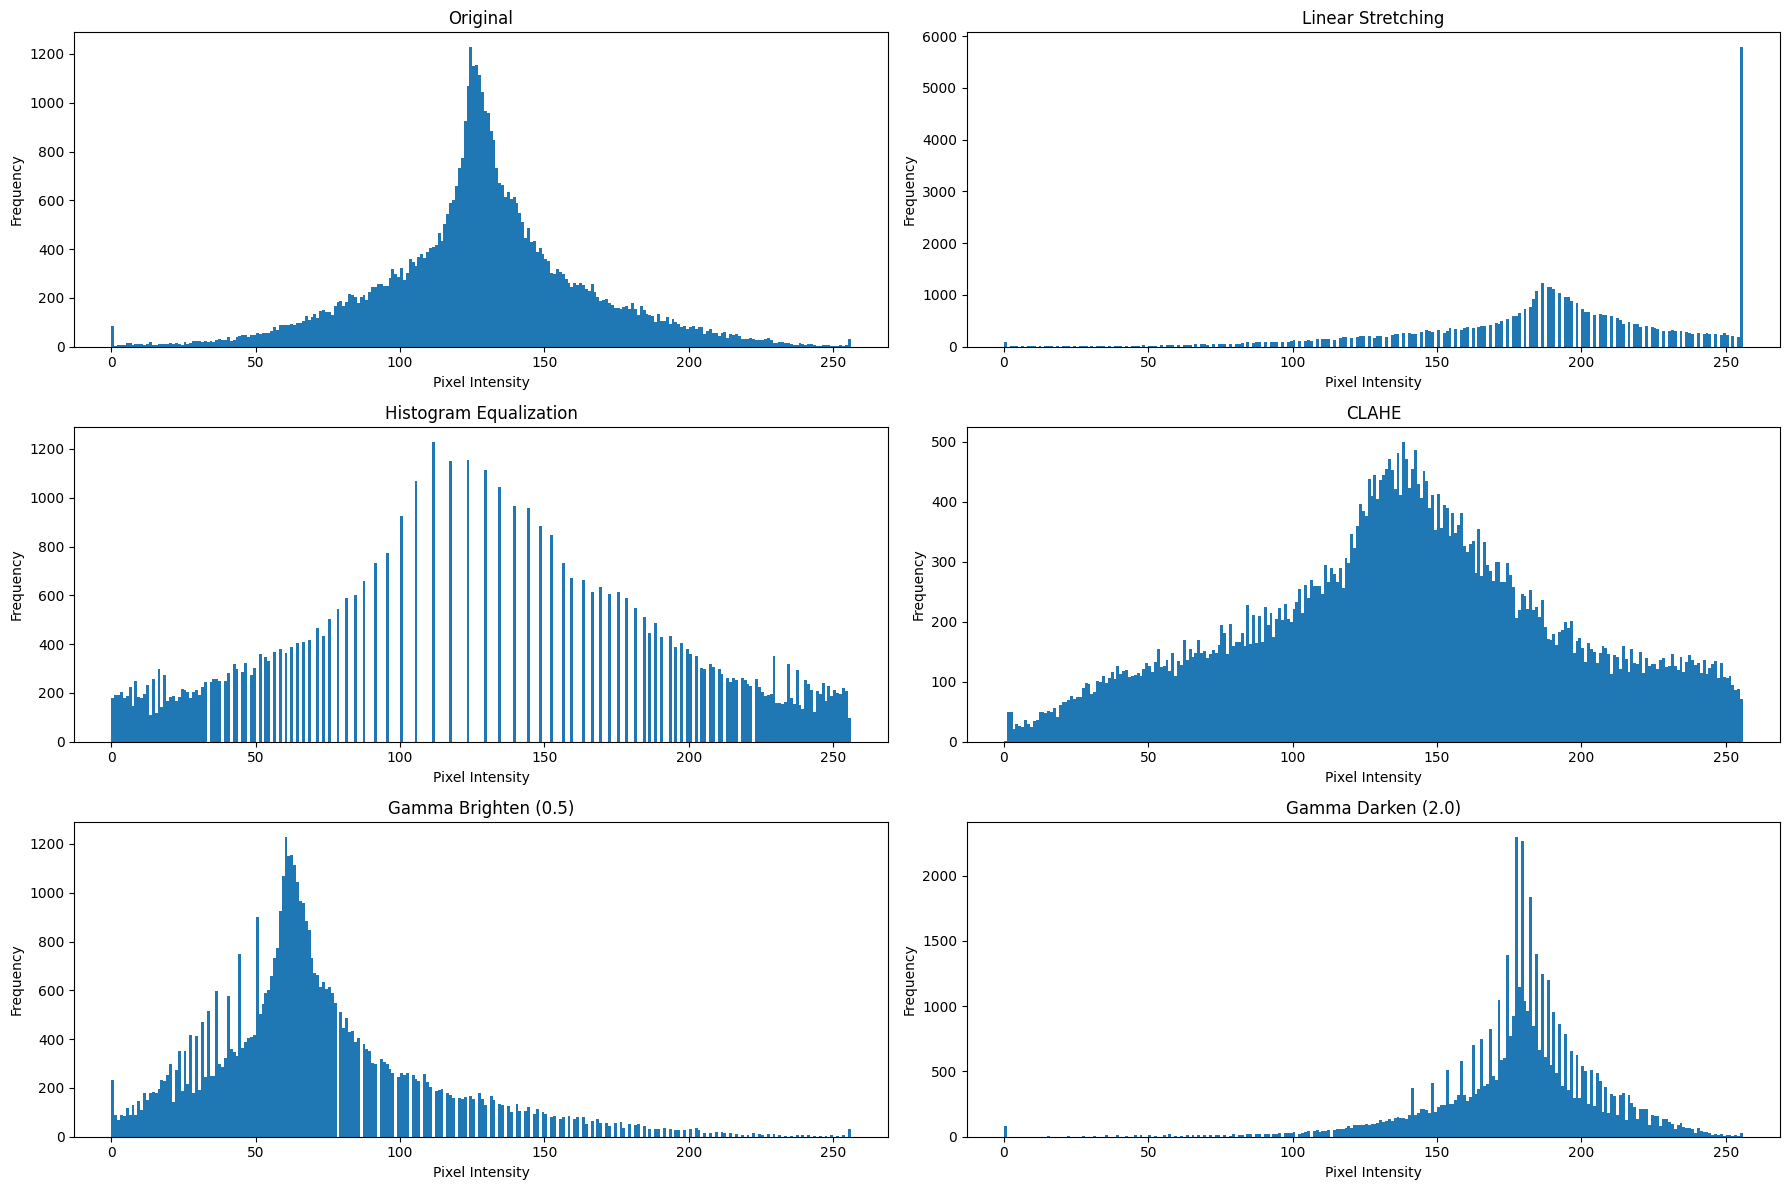

In [47]:
import cv2
import matplotlib.pyplot as plt

images = {
    "Original": gray,
    "Linear Stretching": cv2.cvtColor(adjusted, cv2.COLOR_BGR2GRAY),
    "Histogram Equalization": equalized,
    "CLAHE": final,
    "Gamma Brighten (0.5)": cv2.cvtColor(gamma_corrected_brighten, cv2.COLOR_BGR2GRAY),
    "Gamma Darken (2.0)": cv2.cvtColor(gamma_corrected_darken, cv2.COLOR_BGR2GRAY)
}

plt.figure(figsize=(18, 12))

for i, (title, img) in enumerate(images.items(), 1):
    plt.subplot(3, 2, i)
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Colored Images

### How does the processing differ in grayscale and color images?

**Grayscale**:
- Only 1 channel
- Each pixel has intensity $0-255$
- Shape: `(H, W)`
- Easy to process (single 2D matrix)

**Colored Images:**
- has 3 channels (red, green, blue)
- shape `(H, W, 3)`
- Each pixel - `[B, G, R]`
- More information = more processing

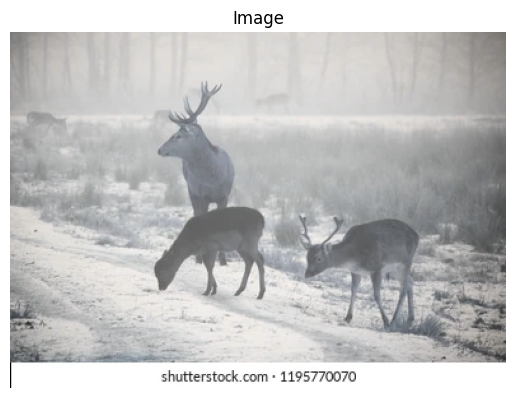

In [21]:
import cv2
import matplotlib.pyplot as plt

# image loading
img = cv2.imread("colored_image.png")


plt.imshow(img)
plt.title("Image")
plt.axis("off")
plt.show()

## 1. Linear contrast stretching

Formula:

$$
I_{new} = \frac{(I - I_{min})}{(I_{max} - I_{min})} \times (O_{max} - O_{min}) + O_{min}
$$

where:
- $I_{min}, I_{max}$ = minimum and maximum intensity in the input channel
- $O_{min}, O_{max}$ = desired output range (usually 0-255)

In [22]:
import cv2
import numpy as np

def linear_contrast_stretch(channel):
  in_min = np.min(channel)
  in_max = np.max(channel)
  out_min = 0
  out_max = 255
  stretched = (channel - in_min) * ((out_max - out_min) / (in_max - in_min)) + out_min
  return stretched.astype(np.uint8)


# apply per channel
b, g, r = cv2.split(img)
b_stretched = linear_contrast_stretch(b)
g_stretched = linear_contrast_stretch(g)
r_stretched = linear_contrast_stretch(r)

img_stretched = cv2.merge((b_stretched, g_stretched, r_stretched))

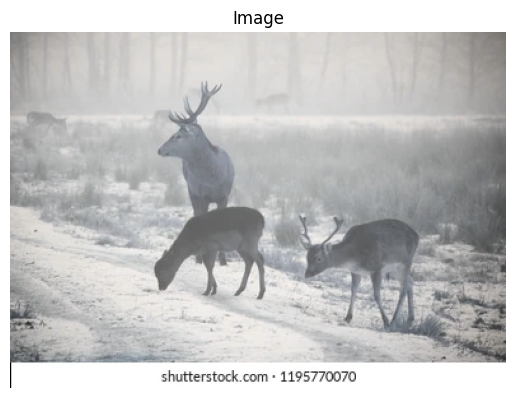

In [23]:
plt.imshow(img_stretched)
plt.title("Image")
plt.axis("off")
plt.show()

## 2. Histogram Equalization per Channel





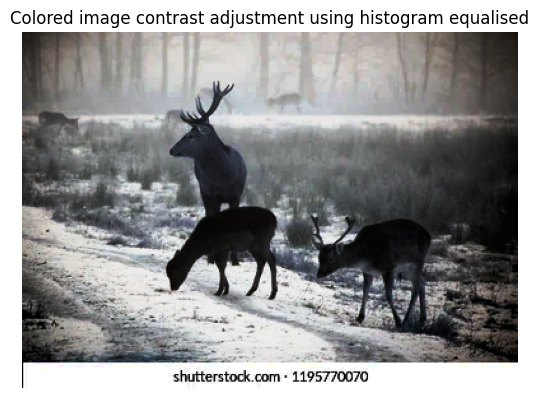

In [24]:
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

img_eq = cv2.merge((b_eq, g_eq, r_eq))

plt.imshow(img_eq)
plt.title('Colored image contrast adjustment using histogram equalised')
plt.axis('off')
plt.show()

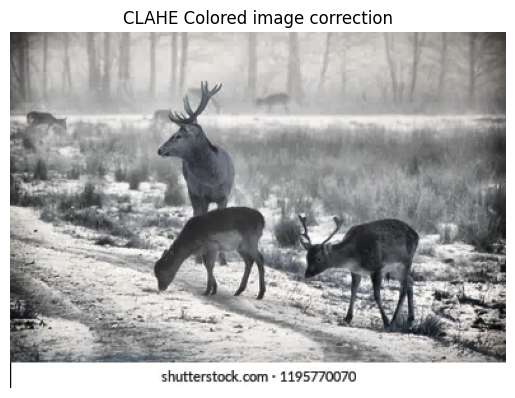

In [25]:
# CLAHE


# convert to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img_lab)

# apply CLAHE on L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)

img_lab_clahe = cv2.merge((l_clahe, a, b))
img_clahe = cv2.cvtColor(img_lab_clahe, cv2.COLOR_LAB2BGR)

plt.imshow(img_clahe)
plt.title('CLAHE Colored image correction')
plt.axis('off')
plt.show()

## Combined Plot

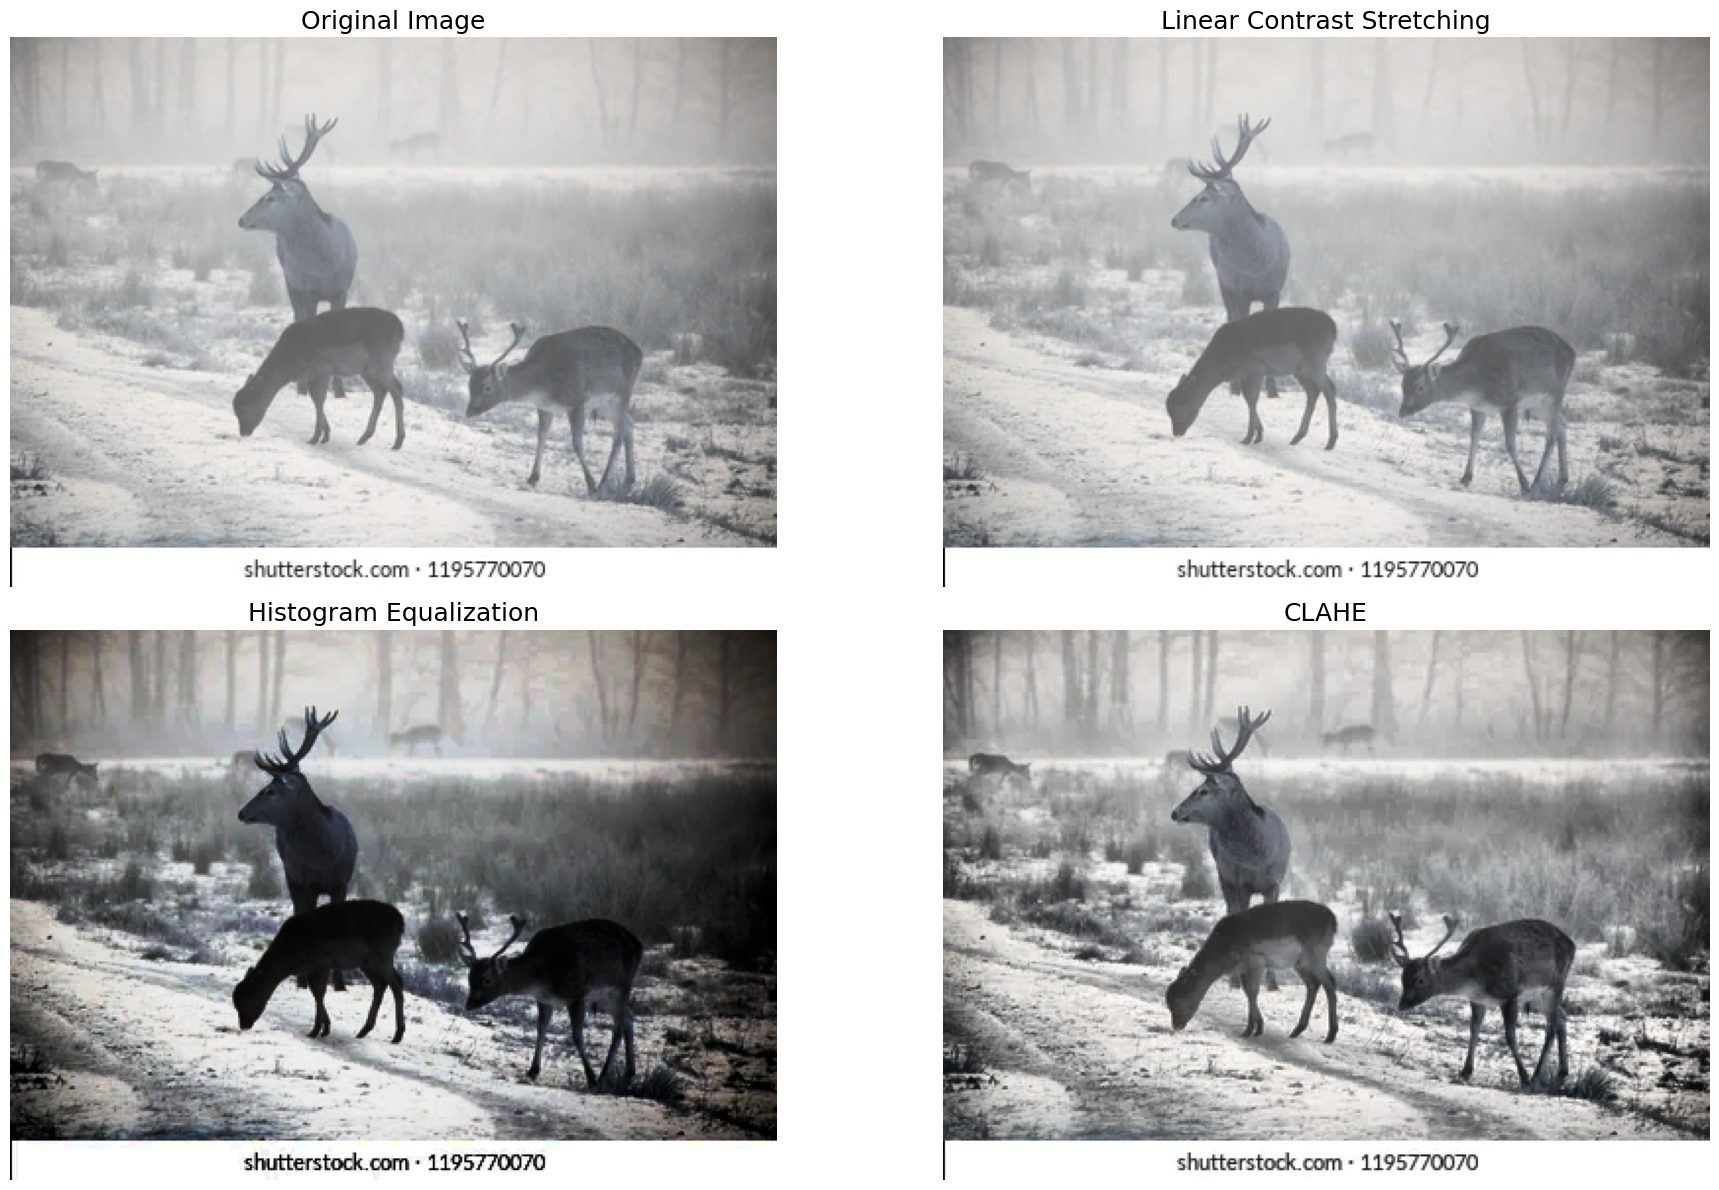

In [26]:
plt.figure(figsize=(20, 12))   # BIGGER image size

# ----------- Row 1 -----------
plt.subplot(2, 2, 1)
plt.title("Original Image", fontsize=18)
plt.imshow(img)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Linear Contrast Stretching", fontsize=18)
plt.imshow(img_stretched)
plt.axis("off")

# ----------- Row 2 -----------
plt.subplot(2, 2, 3)
plt.title("Histogram Equalization", fontsize=18)
plt.imshow(img_eq)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("CLAHE", fontsize=18)
plt.imshow(img_clahe)
plt.axis("off")

plt.tight_layout()
plt.show()

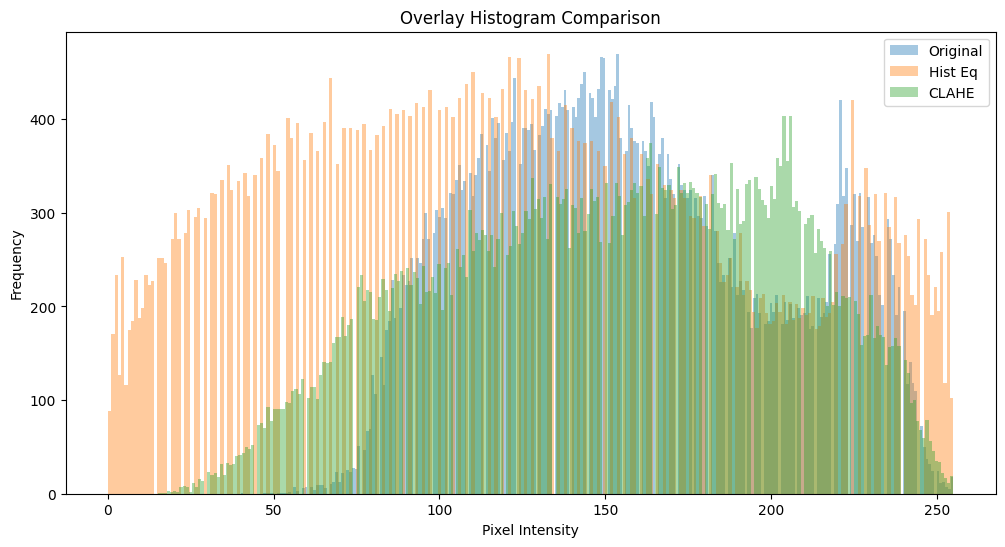

In [29]:
plt.figure(figsize=(12, 6))

plt.hist(gray.ravel(), bins=256, alpha=0.4, label="Original")
plt.hist(equalized.ravel(), bins=256, alpha=0.4, label="Hist Eq")
plt.hist(final.ravel(), bins=256, alpha=0.4, label="CLAHE")

plt.title("Overlay Histogram Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()